In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
### Load the training array, labels and features
train_array = np.load('train_array.npy')
train_labels = np.load('train_labels.npy')
train_features = np.load('train_features.npy')

In [3]:
### Load the validation array, labels and features
valid_array = np.load('valid_array.npy')
valid_labels = np.load('valid_labels.npy')
valid_features = np.load('valid_features.npy')

In [4]:
### Load the test array, labels and features
test_array = np.load('test_array.npy')
test_labels = np.load('test_labels.npy')
test_features = np.load('test_features.npy')

In [5]:
### Create inputs and outputs for training ang validation
X_train = train_features
X_valid = valid_features
X_test = test_features
y_train = train_labels
y_valid = valid_labels
y_test = test_labels

# 1-layer dense network
1-layer dense network i.e. no hidden layer, just the input and output ones

In [6]:
### Create a model
def build_model():
    input_layer = tf.keras.Input(shape=(1280, ))
    output_layer = tf.keras.layers.Dense(6, activation='softmax')(input_layer)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1280)]            0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


The model takes 1280 features as input and extract the probabilities of the 6 categories

In [7]:
### Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

### Fit the model with 20 epochs
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
9/9 [==============================] - 0s 13ms/step - loss: 1.3386 - sparse_categorical_accuracy: 0.5286 - val_loss: 0.8477 - val_sparse_categorical_accuracy: 0.7410
Epoch 2/20
9/9 [==============================] - 0s 3ms/step - loss: 0.6418 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.5321 - val_sparse_categorical_accuracy: 0.8273
Epoch 3/20
9/9 [==============================] - 0s 3ms/step - loss: 0.3741 - sparse_categorical_accuracy: 0.9071 - val_loss: 0.4038 - val_sparse_categorical_accuracy: 0.8633
Epoch 4/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2665 - sparse_categorical_accuracy: 0.9286 - val_loss: 0.3532 - val_sparse_categorical_accuracy: 0.8993
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 0.2074 - sparse_categorical_accuracy: 0.9464 - val_loss: 0.3282 - val_sparse_categorical_accuracy: 0.8921
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 0.1707 - sparse_categorical_accuracy: 0.9464 - va

In [8]:
### Evaluate the model using the test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: {:.2f}'.format(loss))
print('Accuracy: {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 2ms/step - loss: 0.1810 - sparse_categorical_accuracy: 0.9400
Loss: 0.18
Accuracy: 0.94


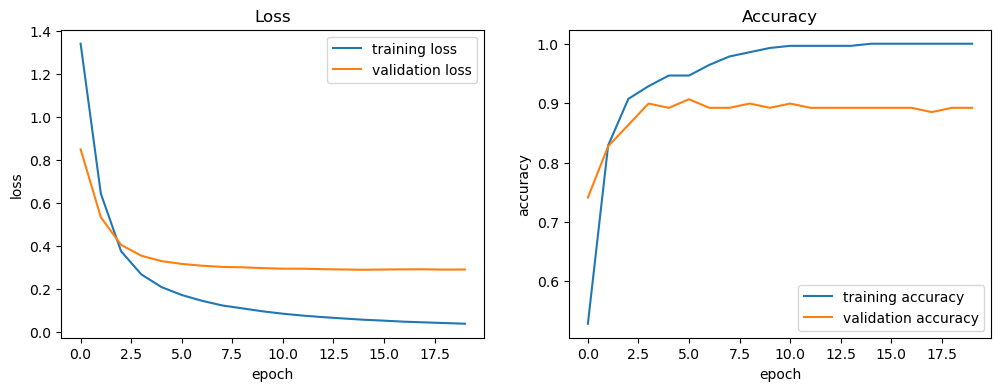

In [9]:
### Plot loss and accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()

ax2.plot(history.history['sparse_categorical_accuracy'], label='training accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy') # last three values
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

1. The training and the validation losses decrease with the epochs.  
2. The training and the validation accuracies increase with the epochs.  
There is no overfitting

### 2-layer dense network i.e. one hidden layer

In [10]:
### Define callbacks
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def build_model():
    input_layer = tf.keras.Input(shape=(1280, ))
    x = tf.keras.layers.Dense(32, activation='relu')(input_layer)
    output_layer = tf.keras.layers.Dense(6, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

model = build_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1280)]            0         
                                                                 
 dense_1 (Dense)             (None, 32)                40992     
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 41,190
Trainable params: 41,190
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(X_train, y_train,
                    epochs=20,
                    callbacks=stop_early,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1/9 [==>...........................] - ETA: 1s - loss: 1.9078 - sparse_categorical_accuracy: 0.2188

C:\Users\enric\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


9/9 [==============================] - 0s 12ms/step - loss: 1.2796 - sparse_categorical_accuracy: 0.5679 - val_loss: 0.7170 - val_sparse_categorical_accuracy: 0.7842
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 0.5296 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.4248 - val_sparse_categorical_accuracy: 0.8777
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 0.2808 - sparse_categorical_accuracy: 0.9429 - val_loss: 0.3169 - val_sparse_categorical_accuracy: 0.9137
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 0.1643 - sparse_categorical_accuracy: 0.9607 - val_loss: 0.2865 - val_sparse_categorical_accuracy: 0.9281
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 0.1134 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.2674 - val_sparse_categorical_accuracy: 0.9137
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.2

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: {:.2f}'.format(loss))
print('Accuracy: {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 999us/step - loss: 0.2183 - sparse_categorical_accuracy: 0.9400
Loss: 0.22
Accuracy: 0.94


With one hidden layer, the loss is the same of the previous model, but the accuracy is bigger.

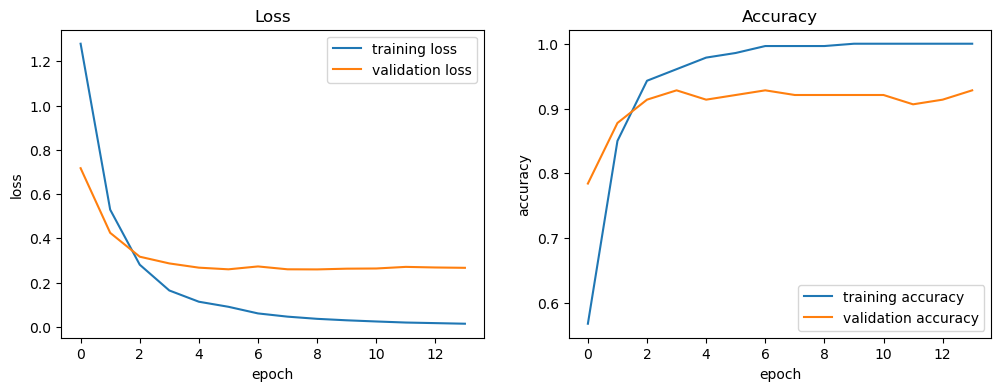

In [13]:
### Plot loss and accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()

ax2.plot(history.history['sparse_categorical_accuracy'], label='training accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy') # last three values
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

Possible overfitting.  
The training loss decreases with the epochs but the validation, after a point, start to increase.  

### Tuning 2-layer dense network

In [14]:
import keras_tuner as kt

In [15]:
def build_model(hp):
    l2_tune = hp.Int('l2', min_value=-5, max_value=8, step=1)
    input_layer = tf.keras.Input(shape=(1280, ))
    x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2=10**l2_tune))(input_layer)
    output_layer = tf.keras.layers.Dense(6, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())
    
    return model

In [16]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3)

Reloading Tuner from .\untitled_project\tuner0.json


In [17]:
### Define callbacks to stop the epochs when validation loss reaches the minimum to avoid overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [18]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [19]:
print(f'Best l2: { 10**best_hps.get("l2") }')
print(f'Best learning rate: { best_hps.get("learning_rate") }')

Best l2: 0.0001
Best learning rate: 0.001


In [20]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train,
                    epochs=50,
                    callbacks=stop_early,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
9/9 [==============================] - 0s 13ms/step - loss: 1.2734 - sparse_categorical_accuracy: 0.5321 - val_loss: 0.7382 - val_sparse_categorical_accuracy: 0.7914
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4656 - sparse_categorical_accuracy: 0.8500 - val_loss: 0.3905 - val_sparse_categorical_accuracy: 0.8921
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2189 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.3458 - val_sparse_categorical_accuracy: 0.8633
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.3121 - val_sparse_categorical_accuracy: 0.8921
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.3045 - val_sparse_categorical_accuracy: 0.8849
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9964 - va

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: {:.2f}'.format(loss))
print('Accuracy: {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 2ms/step - loss: 0.1951 - sparse_categorical_accuracy: 0.9600
Loss: 0.20
Accuracy: 0.96


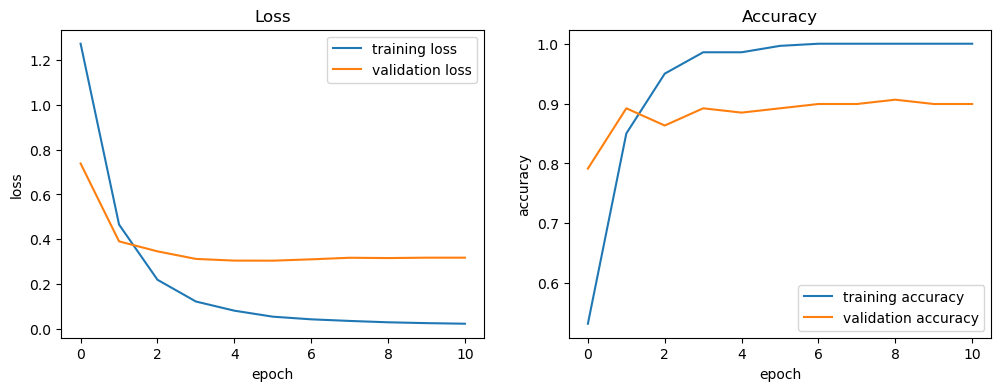

In [22]:
### Plot loss and accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()

ax2.plot(history.history['sparse_categorical_accuracy'], label='training accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy') # last three values
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

After tuning the hyperparameter of the hidden layer, the accuracy is 96% and the loss is 0.18.  
These values are better than the previous 2 models. 